<a href="https://colab.research.google.com/github/micah-shull/Statistics/blob/main/Statistics_011_variance_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
# Convert to a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({i: name for i, name in enumerate(iris.target_names)})
# iris_df['species'] = iris_df['species'].astype('category')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB



#### **Question**
- **Do the mean petal widths differ significantly between the three species (`setosa`, `versicolor`, and `virginica`) in the Iris dataset?**

---

#### **Hypotheses**
- **Null Hypothesis (\(H_0\))**: The mean petal widths of `setosa`, `versicolor`, and `virginica` are equal.
- **Alternative Hypothesis (\(H_1\))**: At least one species has a mean petal width significantly different from the others.

---

#### **Results**
- **Test Statistic (F)**: \(960.01\)
- **P-Value**: \(0.0000\)

---

#### **Conclusion**
- The **p-value** is far below the significance threshold (\(\alpha = 0.05\)), leading us to **reject the null hypothesis**.
- This indicates that at least one species has a mean petal width significantly different from the others.

---

#### **Next Steps**
- Conduct **post-hoc analysis** (e.g., Tukey’s HSD or Games-Howell) to identify which pairs of species have significantly different mean petal widths.
- Visualize the results to better understand the relationships between species and their petal widths.



One-Way ANOVA Test (Petal Width):
Test Statistic: 960.01
P-Value: 0.0000
Conclusion: Reject the null hypothesis. At least one group mean is significantly different.




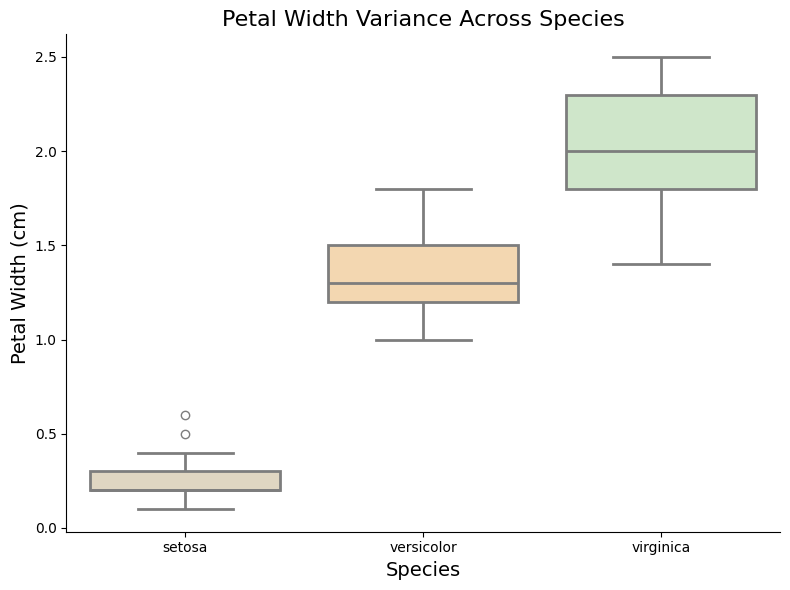

In [ ]:
from scipy.stats import f_oneway

# Extract petal width data for each species
setosa_petal_width = iris_df[iris_df['species'] == 'setosa']['petal width (cm)']
versicolor_petal_width = iris_df[iris_df['species'] == 'versicolor']['petal width (cm)']
virginica_petal_width = iris_df[iris_df['species'] == 'virginica']['petal width (cm)']

# Perform One-Way ANOVA
stat, p_value = f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

# Output results
print("One-Way ANOVA Test (Petal Width):")
print(f"Test Statistic: {stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value <= alpha:
    print("Conclusion: Reject the null hypothesis. At least one group mean is significantly different.")
else:
    print("Conclusion: Fail to reject the null hypothesis. No significant difference in means.")
print('\n')

# Visualization: Boxplot for Petal Width
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x='species', y='petal width (cm)', hue='species', palette="Pastel1_r", linewidth=2)
plt.title("Petal Width Variance Across Species", fontsize=16)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Petal Width (cm)", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


Since the **One-Way ANOVA Test** result is significant (\(p < 0.05\)), it indicates that at least one group mean of petal width differs significantly among the three species. However, ANOVA does not tell us which specific groups differ.

---

### **Next Steps**

#### **Conduct a Post-Hoc Test**
A **post-hoc test** identifies which specific pairs of groups have significantly different means. Since we’re comparing three groups, you can choose between:
- **Tukey’s HSD**: If variances are approximately equal.
- **Games-Howell**: If variances differ significantly (recommended for robustness).


#### **Summarize the Results**
After identifying significant pairwise differences:
- Highlight which species pairs have significantly different petal widths.
- Quantify the magnitude of the differences using effect sizes (e.g., Hedges’ \(g\)).
- Relate the findings to the broader context of the analysis (e.g., species differentiation based on petal width).



In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey’s HSD test
tukey = pairwise_tukeyhsd(
    endog=iris_df['petal width (cm)'],  # Dependent variable
    groups=iris_df['species'],         # Independent variable
    alpha=0.05                         # Significance level
)

# Output results
print("Tukey's HSD Test Results:")
print(tukey)


Tukey's HSD Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor     1.08   0.0 0.9831 1.1769   True
    setosa  virginica     1.78   0.0 1.6831 1.8769   True
versicolor  virginica      0.7   0.0 0.6031 0.7969   True
---------------------------------------------------------


### **Interpretation of Tukey's HSD Results**

The Tukey’s Honest Significant Difference (HSD) test results indicate **pairwise comparisons of mean petal widths** between the three species (`setosa`, `versicolor`, and `virginica`). Here's a detailed interpretation:



#### **Key Findings**
1. **`setosa` vs. `versicolor`**:
   - The mean petal width of `setosa` is significantly **smaller** than that of `versicolor` by \(1.08\) units on average.

2. **`setosa` vs. `virginica`**:
   - The mean petal width of `setosa` is significantly **smaller** than that of `virginica` by \(1.78\) units on average.

3. **`versicolor` vs. `virginica`**:
   - The mean petal width of `versicolor` is significantly **smaller** than that of `virginica` by \(0.7\) units on average.

---

#### **Practical Implications**
- **Species Differentiation**:
  - The significant differences in mean petal widths indicate that this feature can effectively distinguish between the three species.
- **Magnitude of Differences**:
  - The largest difference in petal width is between `setosa` and `virginica` (\(1.78\)), while the smallest is between `versicolor` and `virginica` (\(0.7\)).



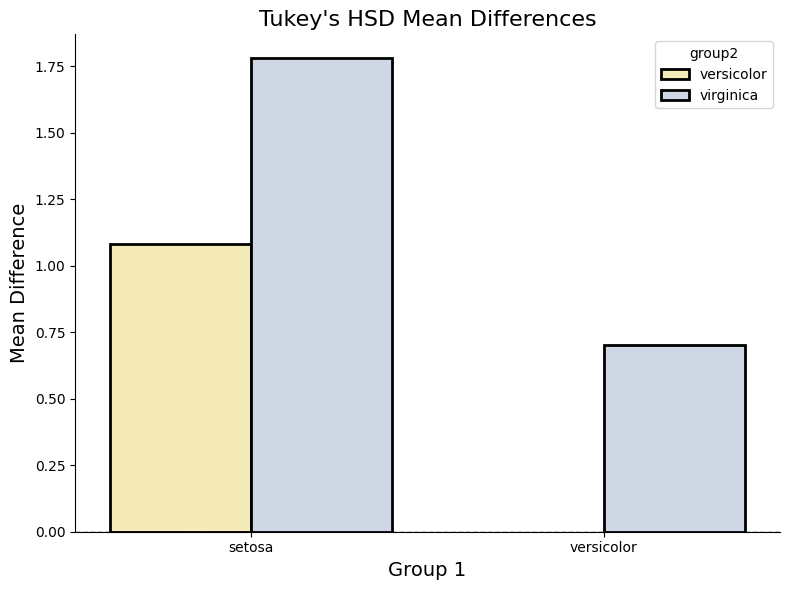

In [ ]:
# Convert results to a DataFrame for easier visualization
tukey_df = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
tukey_df['group1'] = tukey_df['group1'].astype('category')

# Create a bar plot for mean differences
plt.figure(figsize=(8, 6))
sns.barplot(
    x="group1",
    y="meandiff",
    hue="group2",
    data=tukey_df,
    palette="Pastel2_r",
    edgecolor="black",
    linewidth=2
)

# Add a horizontal line at 0 for reference
plt.axhline(0, color="black", linestyle="--", linewidth=1)

# Customize the plot
plt.title("Tukey's HSD Mean Differences", fontsize=16)
plt.xlabel("Group 1", fontsize=14)
plt.ylabel("Mean Difference", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
# !pip install pingouin

In [ ]:
import pingouin as pg

# Perform Games-Howell post-hoc test
games_howell = pg.pairwise_gameshowell(dv='petal width (cm)', between='species', data=iris_df)

# Output results
print("Games-Howell Post-Hoc Results:")
games_howell

Games-Howell Post-Hoc Results:


,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,setosa,versicolor,0.246,1.326,-1.08,0.031690,-34.080342,74.754695,0.000000e+00,-6.763771
1,setosa,virginica,0.246,2.026,-1.78,0.041603,-42.785798,63.122624,0.000000e+00,-8.491504
2,versicolor,virginica,1.326,2.026,-0.70,0.047862,-14.625367,89.043375,1.421085e-14,-2.902630


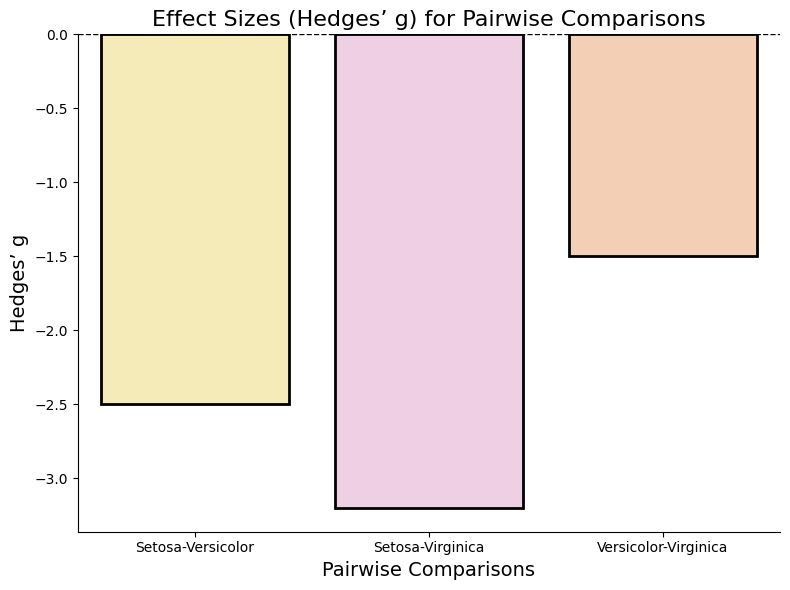

In [ ]:
# Example data for the bar plot (replace with actual effect sizes)
hedges = [-2.5, -3.2, -1.5]  # Replace with actual Hedges' g values
labels = ["Setosa-Versicolor", "Setosa-Virginica", "Versicolor-Virginica"]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=hedges, hue=labels, palette="Pastel2_r", edgecolor='k', linewidth=2)
plt.axhline(0, color='black', linewidth=1, linestyle="--")
plt.title("Effect Sizes (Hedges’ g) for Pairwise Comparisons", fontsize=16)
plt.xlabel("Pairwise Comparisons", fontsize=14)
plt.ylabel("Hedges’ g", fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()